## Case Study: Used Cars

### By: Arnold Reyna




# Graphics Analysis

## CASE STUDY:  Used Cars- 

### Statement: 

United States sells many used cars each year.  Used cars are sold under 2 classifications: ‘CLEAN’, and ‘INSURANCE SALVAGED’.
Want to explore different analytics for used cars:

* 1)	Predict which car models are more likely to become ‘INSURANCE SALVAGED’

* 2)	Predict which models are the best deal:

* a.	     Which models depreciate most per mile
* b.	     Which models retail most value over time

* 3)	Predict the price of a used car based off its year, mileage



•	Source of data from Kaggle.com. 
o	https://www.kaggle.com/doaaalsenani/usa-cers-dataset


In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from statistics import mean 

import yellowbrick

In [226]:
#!conda install -c districtdatalabs yellowbrick

In [227]:
# Step 1:  Load data into a dataframe
addr1 = "USA_cars_datasets.csv"
data = pd.read_csv(addr1)
data2 = data

In [228]:
# Step 2:  check the dimension of the table
print("The dimension of the table is: ", data.shape)


The dimension of the table is:  (2499, 13)


In [229]:
#Step 3:  Look at the data
data.head(5)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [230]:
#Step 5:  what type of variables are in the table 

print("Describe Data\n")
print(data.describe())

print("\n\nSummarized Data\n")
print(data.count())
print(data.groupby('title_status').count())


Describe Data

        Unnamed: 0         price         year       mileage           lot
count  2499.000000   2499.000000  2499.000000  2.499000e+03  2.499000e+03
mean   1249.000000  18767.671469  2016.714286  5.229869e+04  1.676914e+08
std     721.543484  12116.094936     3.442656  5.970552e+04  2.038772e+05
min       0.000000      0.000000  1973.000000  0.000000e+00  1.593488e+08
25%     624.500000  10200.000000  2016.000000  2.146650e+04  1.676253e+08
50%    1249.000000  16900.000000  2018.000000  3.536500e+04  1.677451e+08
75%    1873.500000  25555.500000  2019.000000  6.347250e+04  1.677798e+08
max    2498.000000  84900.000000  2020.000000  1.017936e+06  1.678055e+08


Summarized Data

Unnamed: 0      2499
price           2499
brand           2499
model           2499
year            2499
title_status    2499
mileage         2499
color           2499
vin             2499
lot             2499
state           2499
country         2499
condition       2499
dtype: int64
              

In [231]:
print ('Year values:\n',data['year'].value_counts())


Year values:
 2019    892
2018    395
2017    377
2016    203
2015    196
2014    104
2013     86
2012     72
2020     48
2011     23
2008     18
2010     13
2009     11
2003      9
2006      8
2004      6
2005      6
2007      6
2001      5
2000      4
1998      4
1997      2
2002      2
1996      2
1994      2
1999      1
1973      1
1993      1
1995      1
1984      1
Name: year, dtype: int64


In [232]:
print ('Color values:\n',data['color'].value_counts())


Color values:
 white                                      707
black                                      516
gray                                       395
silver                                     300
red                                        192
blue                                       151
no_color                                    61
green                                       24
orange                                      20
gold                                        19
charcoal                                    18
brown                                       15
yellow                                       9
magnetic metallic                            6
beige                                        5
color:                                       5
shadow black                                 5
ingot silver metallic                        4
oxford white                                 4
triple yellow tri-coat                       3
billet silver metallic clearcoat             

In [233]:
print ('Model  values:\n',data['model'].value_counts())


Model  values:
 door         651
f-150        219
doors        148
caravan      102
mpv           87
            ... 
discovery      1
dart           1
soul           1
mdx            1
suv            1
Name: model, Length: 127, dtype: int64


In [234]:
print ('Brand (Make) values:\n',data['brand'].value_counts())


Brand (Make) values:
 ford               1235
dodge               432
nissan              312
chevrolet           297
gmc                  42
jeep                 30
chrysler             18
bmw                  17
hyundai              15
kia                  13
buick                13
honda                12
infiniti             12
cadillac             10
mercedes-benz        10
heartland             5
audi                  4
land                  4
peterbilt             4
acura                 3
lincoln               2
lexus                 2
mazda                 2
toyota                1
maserati              1
harley-davidson       1
ram                   1
jaguar                1
Name: brand, dtype: int64


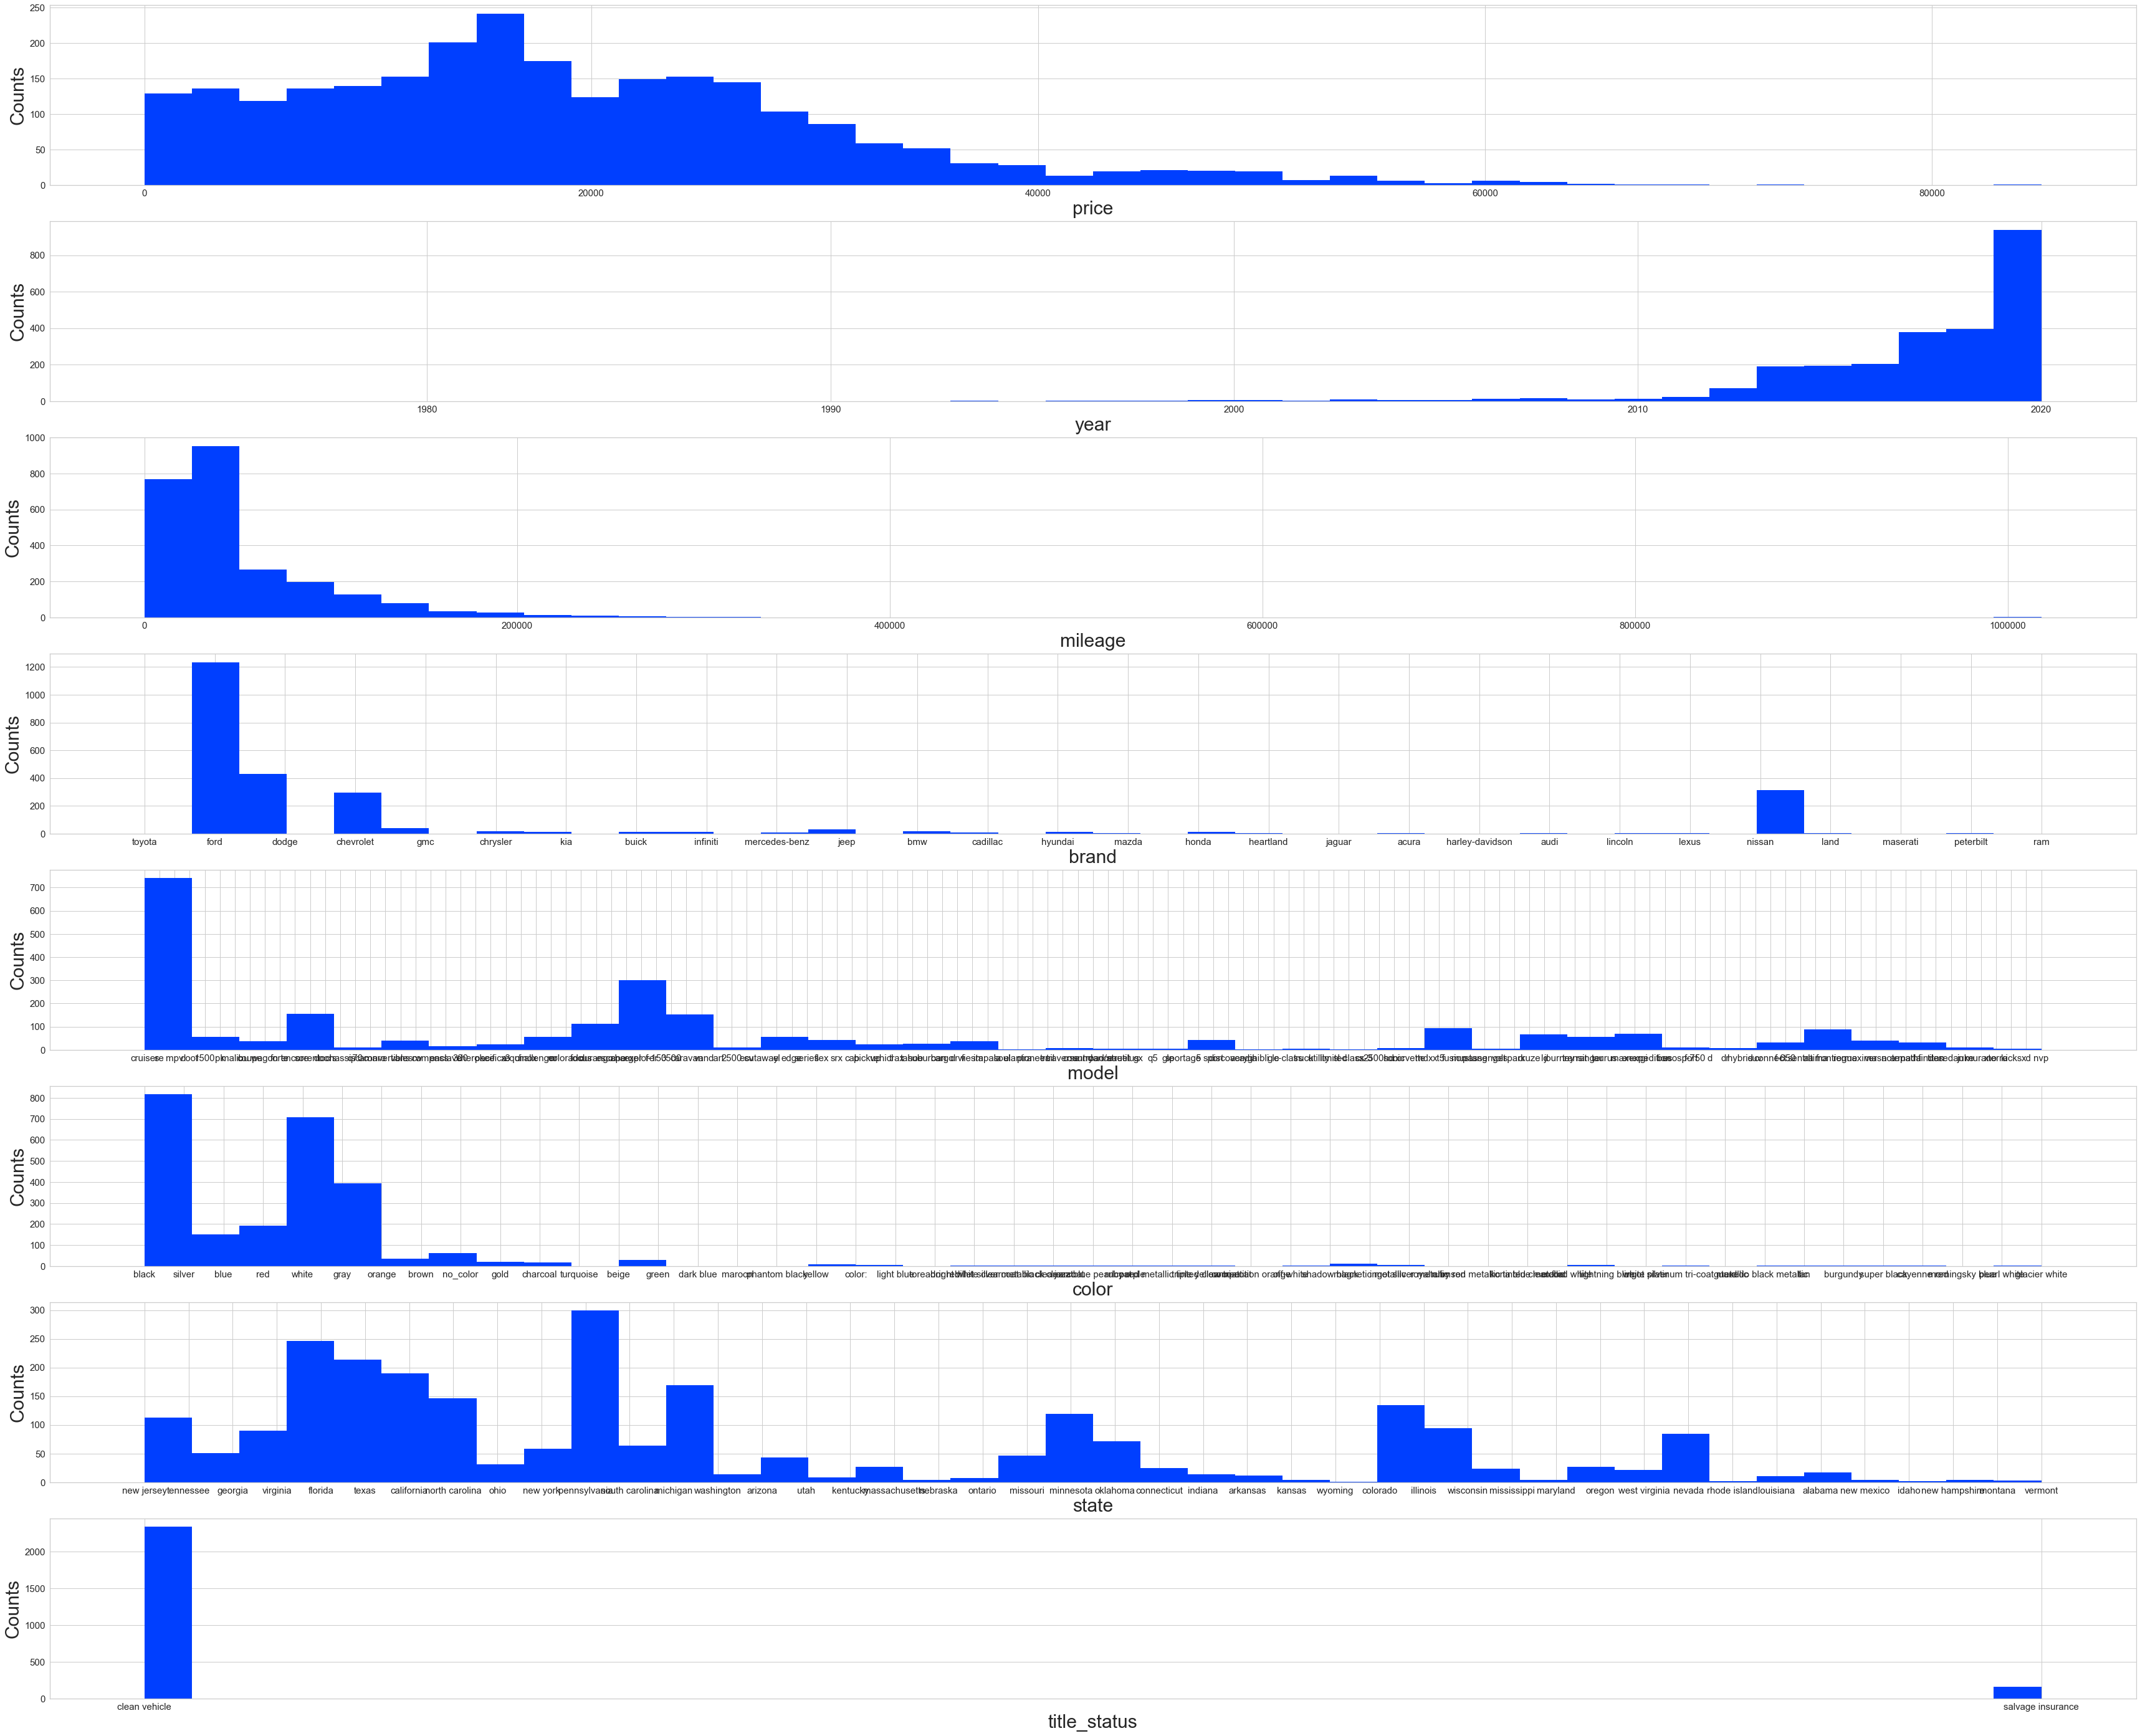

In [235]:
#Step 6: import visulization packages
import matplotlib.pyplot as plt

# set up the figure size
plt.rcParams['figure.figsize'] = (60, 50)

# make subplots
fig, axes = plt.subplots(nrows = 8, ncols = 1)

# Specify the features of interest
num_features_only = ['price', 'year', 'mileage','brand','model','color','state']
num_features = ['price', 'year', 'mileage','brand','model','color','state','title_status']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=30)
    ax.set_ylabel(yaxes[idx], fontsize=30)
    ax.tick_params(axis='both', labelsize=15)
#plt.show()

In [236]:

def intify(s):
    u = np.unique(s)
    return s.map({k: i for i, k in enumerate(u)})

data_intify=data.apply(intify)

data_intify

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,166,27,25,17,0,2425,2,2392,0,24,1,3
1,1,58,8,92,20,0,2385,39,1665,1,35,1,39
2,2,139,7,75,27,0,1378,39,1885,762,7,1,16
3,3,522,8,32,23,0,1823,4,967,1427,39,1,20
4,4,579,5,0,27,0,61,34,2087,1580,6,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,207,24,120,28,0,661,34,2230,1025,3,1,0
2495,2495,234,24,120,27,0,1160,39,2213,1575,6,1,19
2496,2496,234,24,120,27,0,1015,39,2228,1576,6,1,19
2497,2497,234,24,120,27,0,1064,2,2203,1577,6,1,16


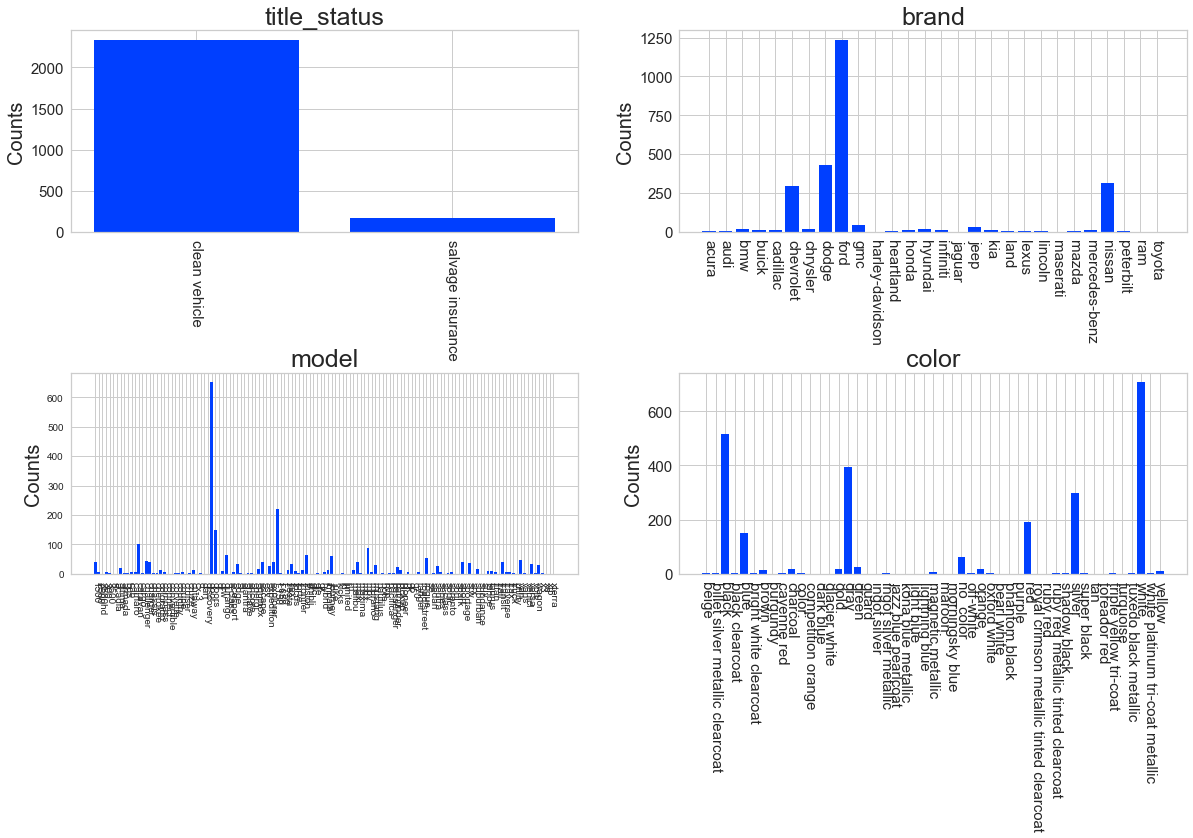

In [237]:
#7:  Barcharts: set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.subplots_adjust(hspace=.7)

# make the data read to feed into the visulizer
X_Survived = data.replace({'title_status': {1: 'yes', 0: 'no'}}).groupby('title_status').size().reset_index(name='Counts')['title_status']
Y_Survived = data.replace({'title_status': {1: 'yes', 0: 'no'}}).groupby('title_status').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('title_status', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].tick_params(axis='x', rotation=-90)

# make the data read to feed into the visulizer
X_brand = data.groupby('brand').size().reset_index(name='Counts')['brand']
Y_brand = data.groupby('brand').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0, 1].bar(X_brand, Y_brand)
axes[0, 1].set_title('brand', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].tick_params(axis='x', rotation=-90)

# make the data read to feed into the visulizer
X_model = data.groupby('model').size().reset_index(name='Counts')['model']
Y_model = data.groupby('model').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_model, Y_model)
axes[1, 0].set_title('model', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=10)
axes[1, 0].tick_params(axis='x', rotation=-90)

# make the data read to feed into the visulizer
X_color = data.groupby('color').size().reset_index(name='Counts')['color']
Y_color = data.groupby('color').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_color, Y_color)
axes[1, 1].set_title('color', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

axes[1, 1].tick_params(axis='x', rotation=-90)



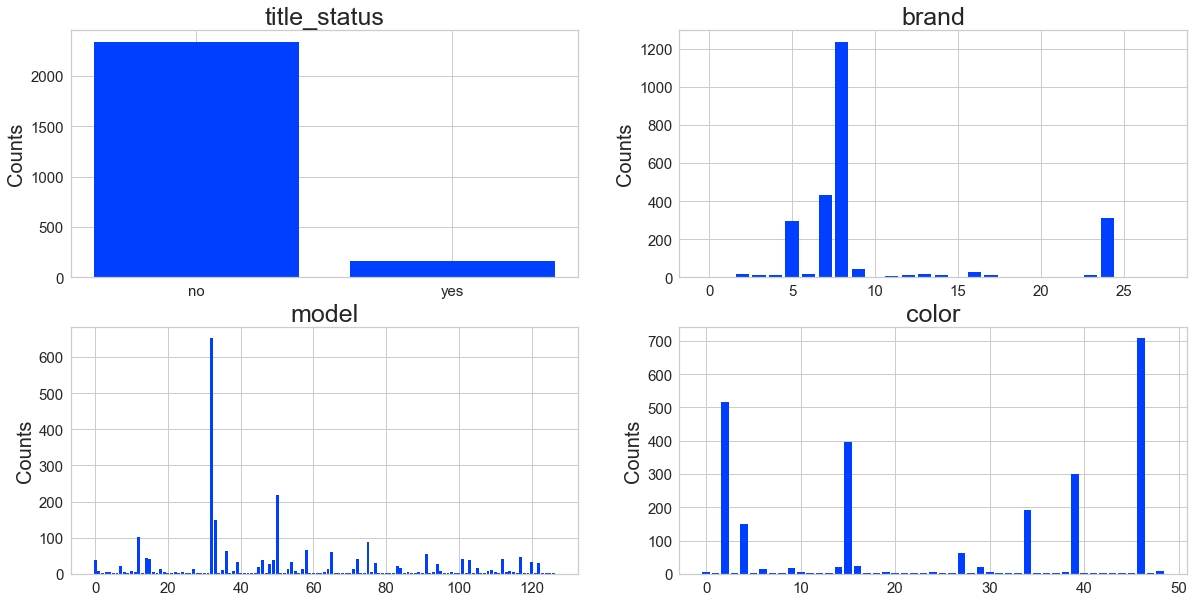

In [238]:
### TESTING SAME GRAPHS ABOVE ON INTEFY DATA:

#7:  Barcharts: set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_Survived = data_intify.replace({'title_status': {1: 'yes', 0: 'no'}}).groupby('title_status').size().reset_index(name='Counts')['title_status']
Y_Survived = data_intify.replace({'title_status': {1: 'yes', 0: 'no'}}).groupby('title_status').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('title_status', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_brand = data_intify.groupby('brand').size().reset_index(name='Counts')['brand']
Y_brand = data_intify.groupby('brand').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0, 1].bar(X_brand, Y_brand)
axes[0, 1].set_title('brand', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_model = data_intify.groupby('model').size().reset_index(name='Counts')['model']
Y_model = data_intify.groupby('model').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_model, Y_model)
axes[1, 0].set_title('model', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_color = data_intify.groupby('color').size().reset_index(name='Counts')['color']
Y_color = data_intify.groupby('color').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_color, Y_color)
axes[1, 1].set_title('color', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

#plt.show()

In [239]:
data[num_features]


,price,year,mileage,brand,model,color,state,title_status
0,6300,2008,274117.0,toyota,cruiser,black,new jersey,clean vehicle
1,2899,2011,190552.0,ford,se,silver,tennessee,clean vehicle
2,5350,2018,39590.0,dodge,mpv,silver,georgia,clean vehicle
3,25000,2014,64146.0,ford,door,blue,virginia,clean vehicle
4,27700,2018,6654.0,chevrolet,1500,red,florida,clean vehicle
...,...,...,...,...,...,...,...,...
2494,7800,2019,23609.0,nissan,versa,red,california,clean vehicle
2495,9200,2018,34553.0,nissan,versa,silver,florida,clean vehicle
2496,9200,2018,31594.0,nissan,versa,silver,florida,clean vehicle
2497,9200,2018,32557.0,nissan,versa,black,florida,clean vehicle


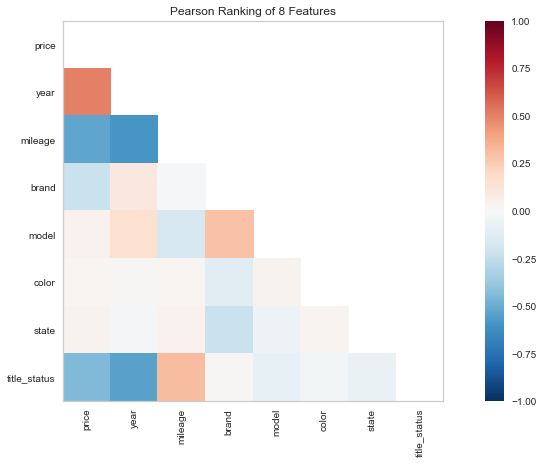

In [240]:
#Step 8: Pearson Ranking
#set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = data_intify[num_features].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="pcoords1.png") # Draw/show/poof the data
#plt.show()

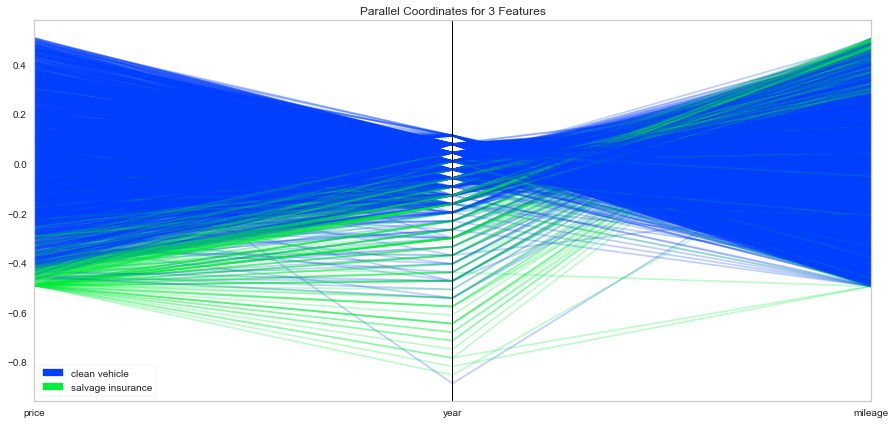

In [241]:
import seaborn as sns
from yellowbrick.features import RadViz
from yellowbrick.datasets import load_occupancy

# Step 9:  Compare variables against Survived and Not Survived
#set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['clean vehicle', 'salvage insurance']
num_features = ['price', 'year', 'mileage']

# copy data to a new dataframe
data_norm = data_intify.copy()
for feature in num_features:
    data_norm[feature] = (data_intify[feature] - data_intify[feature].mean(skipna=True)) / (data_intify[feature].max(skipna=True) - data_intify[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].to_numpy()
y = data_intify.title_status.to_numpy()

# Instantiate the visualizer
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)


visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data

visualizer.show()
#plt.show()

In [242]:
#Sex_survived = data.brand(['title_status']==1)
Sex_survived = data_intify[data_intify['title_status'] > 80]


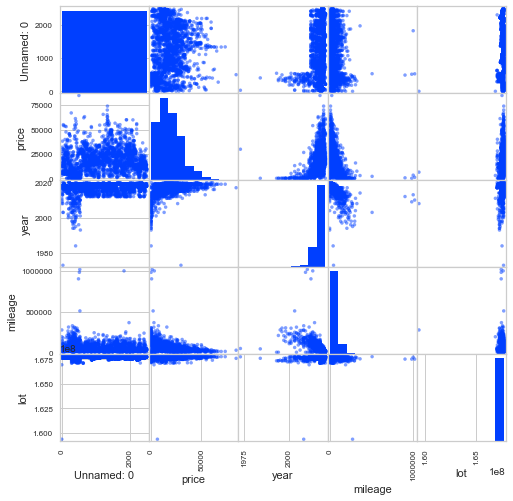

In [243]:
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(data, figsize = (8,8))
plt.show()



In [244]:
# Find NaN: 
data.isnull().sum().sum()

0

In [245]:
data

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


In [247]:
# Count of Titles status for each Feature:

data.groupby('title_status').count()

,Unnamed: 0,price,brand,model,year,mileage,color,vin,lot,state,country,condition
title_status,,,,,,,,,,,,
clean vehicle,2336,2336,2336,2336,2336,2336,2336,2336,2336,2336,2336,2336
salvage insurance,163,163,163,163,163,163,163,163,163,163,163,163


In [248]:
# total Count of Titles status:

data['title_status'].value_counts()

clean vehicle        2336
salvage insurance     163
Name: title_status, dtype: int64

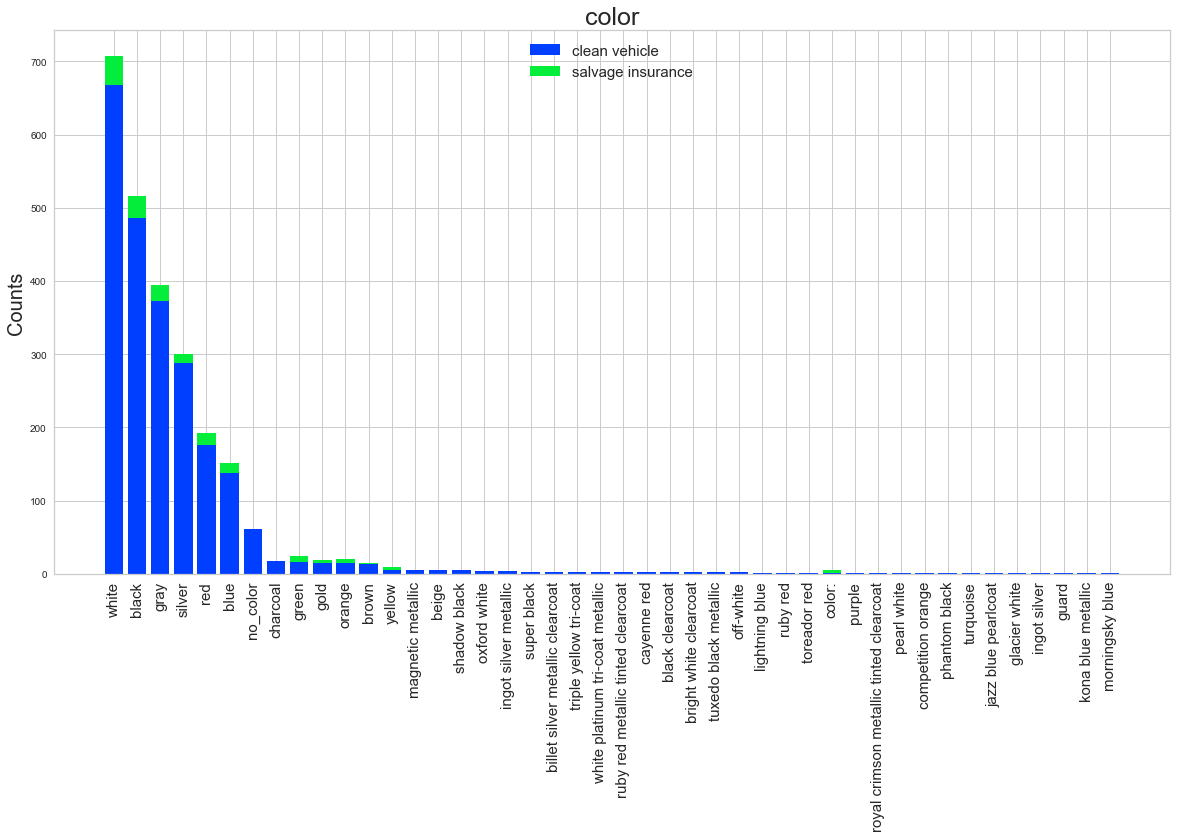

In [249]:
# ATTEMPT TO GRAPH JUST COLOR:

plt.rcParams['figure.figsize'] = (20, 10)


# make subplots
fig, axes = plt.subplots()

# make the data read to feed into the visualizer
color_clean = data.replace({'title_status': {1: 'clean vehicle', 0: 'salvage insurance'}})[data['title_status']=='clean vehicle']['color'].value_counts()
color_salvaged = data.replace({'title_status': {1: 'clean vehicle', 0: 'salvage insurance'}})[data['title_status']=='salvage insurance']['color'].value_counts()
color_salvaged = color_salvaged.reindex(index = color_clean.index)
#color_salvaged.fillna('', inplace=True)

# make the bar plot
p5 = axes.bar(color_clean.index, color_clean.values)
p6 = axes.bar(color_salvaged.index, color_salvaged.values, bottom=color_clean.values)
axes.set_title('color', fontsize=25)
axes.set_ylabel('Counts', fontsize=20)
axes.tick_params(axis='x', labelrotation = 90,labelsize=15)
axes.legend((p5, p6), ('clean vehicle', 'salvage insurance'), fontsize = 15,loc='upper center')
#plt.show()

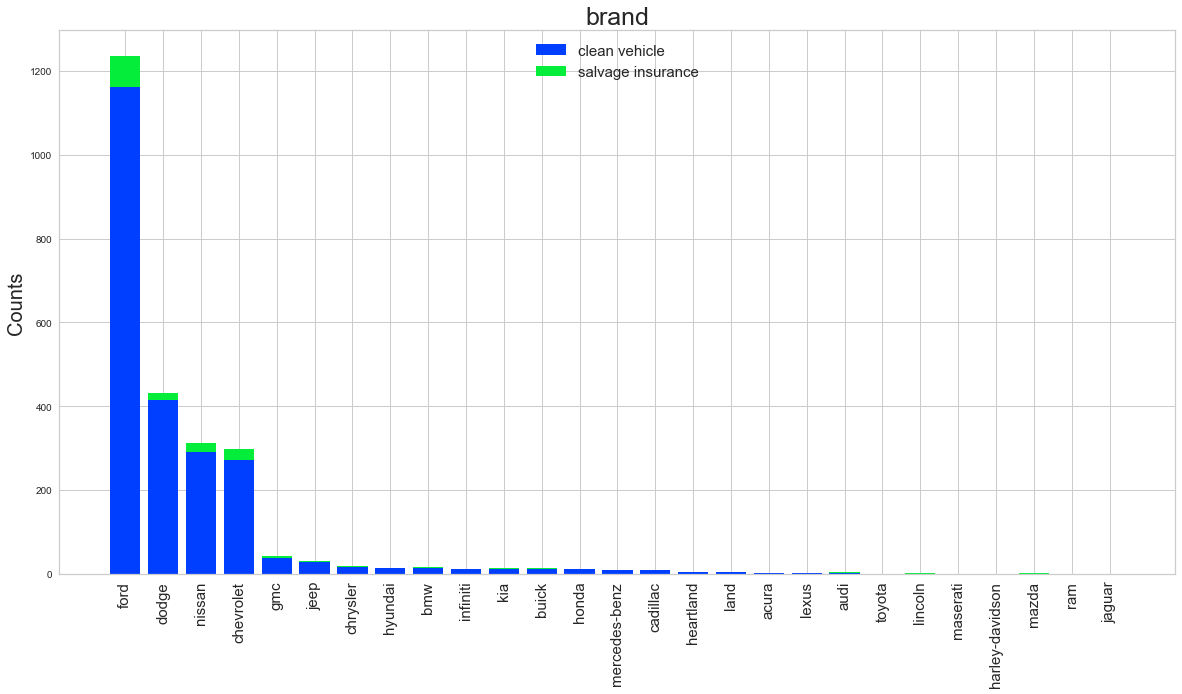

In [250]:
# ATTEMPT TO GRAPH JUST BRAND:

# make subplots
fig, axes = plt.subplots()

# make the data read to feed into the visualizer
brand_clean = data.replace({'title_status': {1: 'clean vehicle', 0: 'salvage insurance'}})[data['title_status']=='clean vehicle']['brand'].value_counts()
brand_salvaged = data.replace({'title_status': {1: 'clean vehicle', 0: 'salvage insurance'}})[data['title_status']=='salvage insurance']['brand'].value_counts()
brand_salvaged = brand_salvaged.reindex(index = brand_clean.index)
#brand_salvaged.fillna('', inplace=True)

# make the bar plot
p5 = axes.bar(brand_clean.index, brand_clean.values)
p6 = axes.bar(brand_salvaged.index, brand_salvaged.values, bottom=brand_clean.values)
axes.set_title('brand', fontsize=25)
axes.set_ylabel('Counts', fontsize=20)
#axes.tick_params(axis='both', labelsize=15)
axes.tick_params(axis='x', labelrotation = 90,labelsize=15)

axes.legend((p5, p6), ('clean vehicle', 'salvage insurance'), fontsize = 15,loc='upper center')
#plt.show()

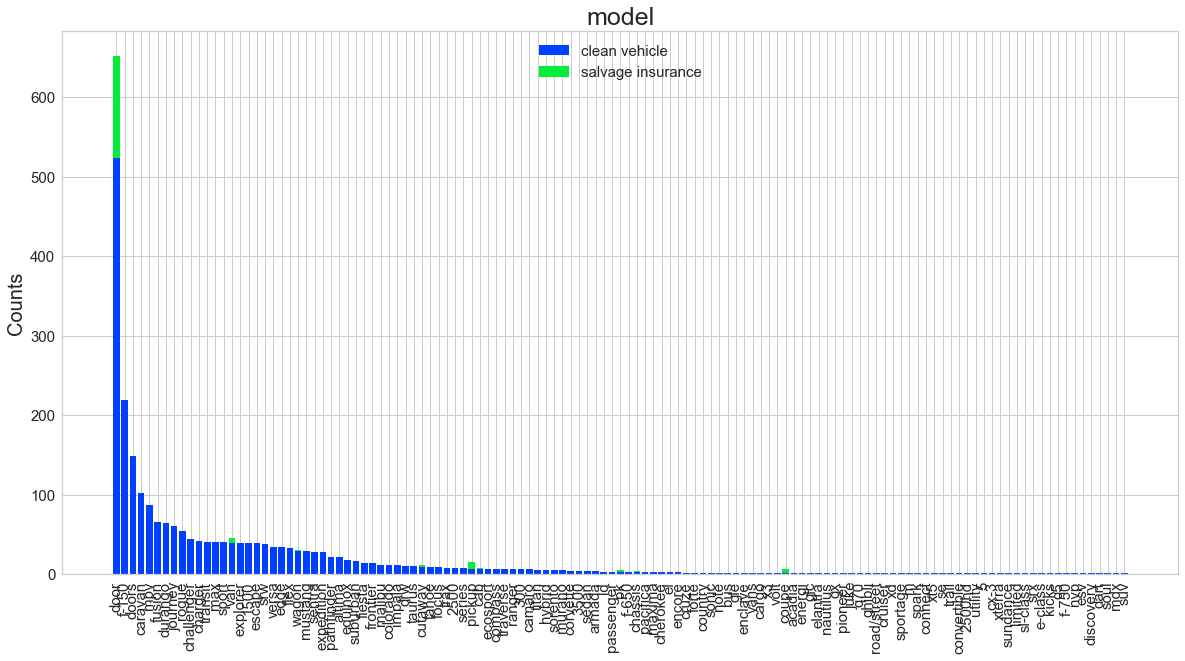

In [251]:
# ATTEMPT TO GRAPH JUST MODEL:

plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots()

# make the data read to feed into the visualizer
model_clean = data.replace({'title_status': {1: 'clean vehicle', 0: 'salvage insurance'}})[data['title_status']=='clean vehicle']['model'].value_counts()
model_salvaged = data.replace({'title_status': {1: 'clean vehicle', 0: 'salvage insurance'}})[data['title_status']=='salvage insurance']['model'].value_counts()
model_salvaged = model_salvaged.reindex(index = model_clean.index)
#model_salvaged.fillna('', inplace=True)

# make the bar plot
p5 = axes.bar(model_clean.index, model_clean.values)
p6 = axes.bar(model_salvaged.index, model_salvaged.values, bottom=model_clean.values)
axes.set_title('model', fontsize=25)
axes.set_ylabel('Counts', fontsize=20)
axes.tick_params(axis='both', labelsize=15)
axes.tick_params(axis='x', labelrotation = 90)
axes.legend((p5, p6), ('clean vehicle', 'salvage insurance'), fontsize = 15,loc='upper center')
#plt.show()

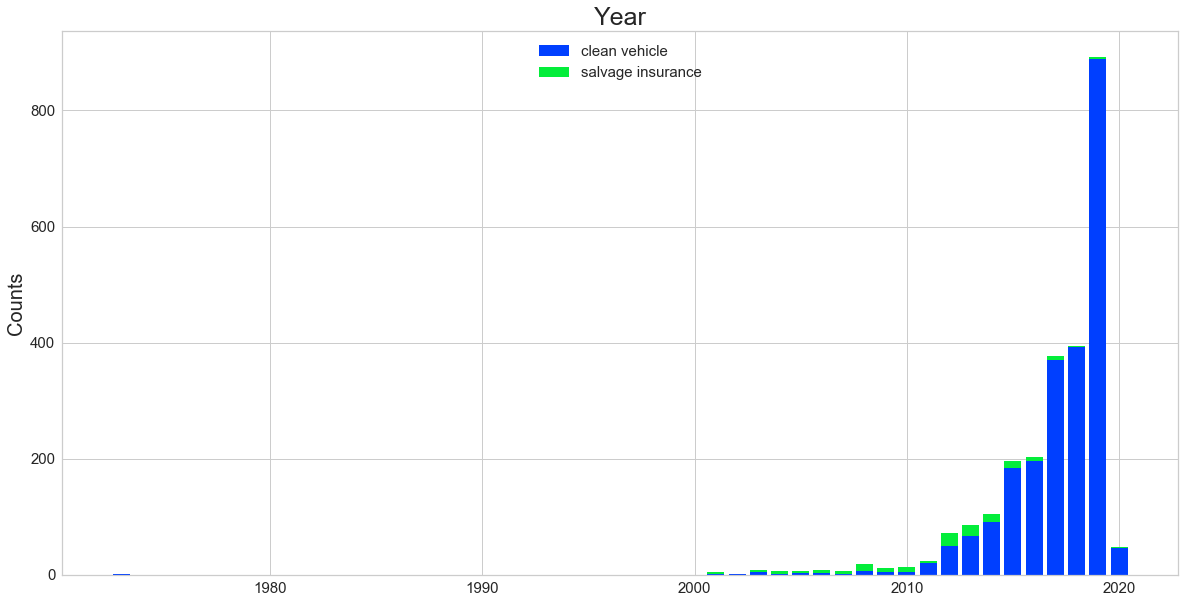

In [252]:
# ATTEMPT TO GRAPH JUST YEAR:

# make subplots
fig, axes = plt.subplots()

# make the data read to feed into the visualizer
year_clean = data.replace({'title_status': {1: 'clean vehicle', 0: 'salvage insurance'}})[data['title_status']=='clean vehicle']['year'].value_counts()
year_salvaged = data.replace({'title_status': {1: 'clean vehicle', 0: 'salvage insurance'}})[data['title_status']=='salvage insurance']['year'].value_counts()
year_salvaged = year_salvaged.reindex(index = year_clean.index)
#year_salvaged.fillna('', inplace=True)

# make the bar plot
p5 = axes.bar(year_clean.index, year_clean.values)
p6 = axes.bar(year_salvaged.index, year_salvaged.values, bottom=year_clean.values)
axes.set_title('Year', fontsize=25)
axes.set_ylabel('Counts', fontsize=20)
axes.tick_params(axis='both', labelsize=15)

axes.legend((p5, p6), ('clean vehicle', 'salvage insurance'), fontsize = 15,loc='upper center')
#plt.show()

In [253]:
# Cleansing:  Need to remove spaces from 'state' column, causing error in Logistics regression: 

data['state'].replace('\s+', '_',regex=True,inplace=True)


In [254]:
data

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new_jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [255]:
data.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


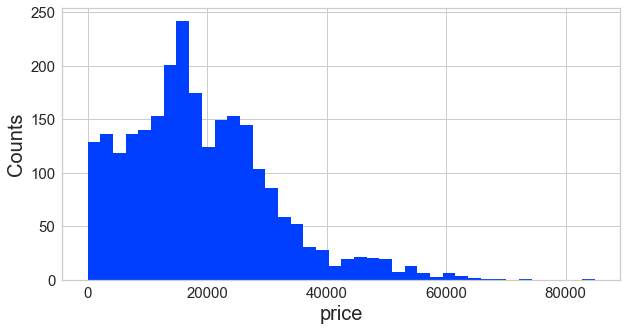

In [256]:
#Step 12 - adjust skewed data (PRICE)
#check the distribution using histogram
# set up the figure size

# check the data
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data['price'], bins=40)
plt.xlabel('price', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
#plt.show()

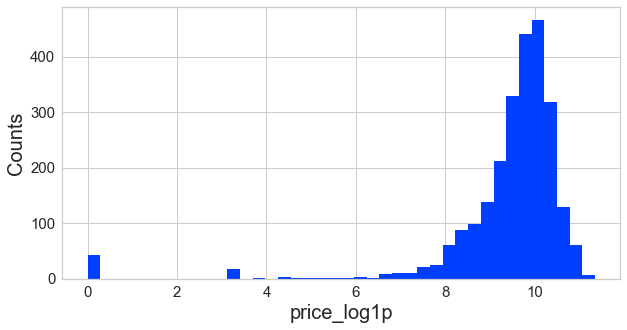

In [257]:
#Step 12 - adjust skewed data (PRICE)
#check the distribution using histogram
# set up the figure size

# log-transformation
def log_transformation(data):
    return data.apply(np.log1p)

data['price_log1p'] = log_transformation(data['price'])

# check the data
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data['price_log1p'], bins=40)
plt.xlabel('price_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
#plt.show()



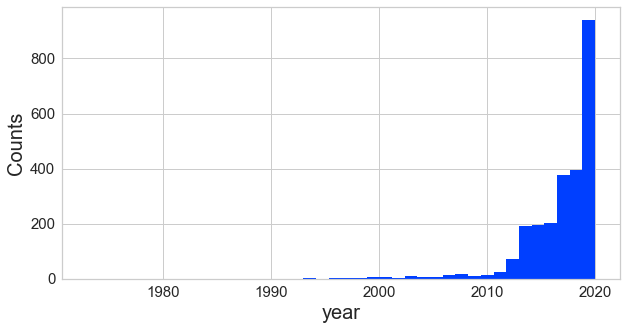

In [258]:
#Step 12 - adjust skewed data (YEAR)
#check the distribution using histogram
# set up the figure size

# check the data
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data['year'], bins=40)
plt.xlabel('year', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
#plt.show()

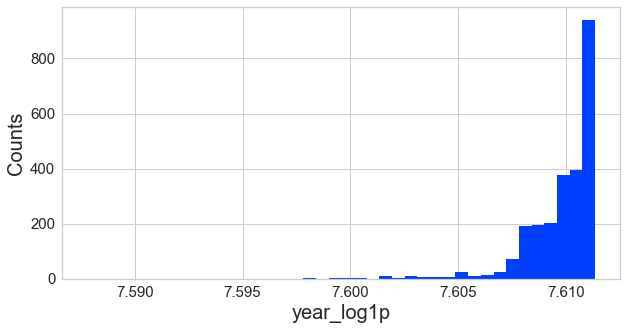

In [259]:
#Step 12 - adjust skewed data (YEAR)
#check the distribution using histogram
# set up the figure size

# log-transformation
def log_transformation(data):
    return data.apply(np.log1p)

data['year_log1p'] = log_transformation(data['year'])

# check the data
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data['year_log1p'], bins=40)
plt.xlabel('year_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
#plt.show()

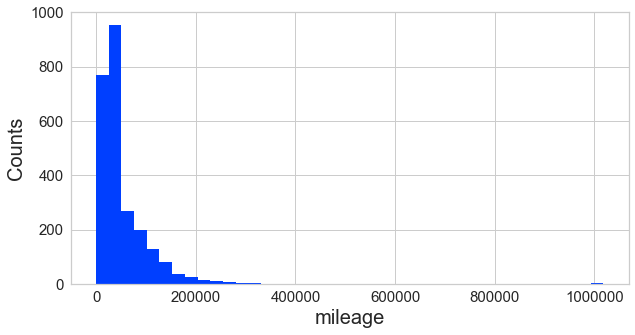

In [260]:
#Step 12 - adjust skewed data (MILEAGE)
#check the distribution using histogram
# set up the figure size

# check the data
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data['mileage'], bins=40)
plt.xlabel('mileage', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
#plt.show()

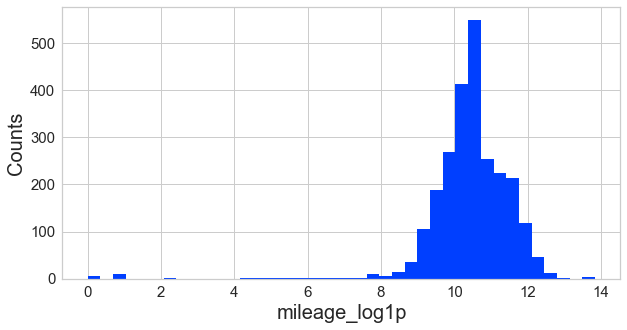

In [261]:
#Step 12 - adjust skewed data (MILEAGE)
#check the distribution using histogram
# set up the figure size

# log-transformation
def log_transformation(data):
    return data.apply(np.log1p)

data['mileage_log1p'] = log_transformation(data['mileage'])

# check the data
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data['mileage_log1p'], bins=40)
plt.xlabel('mileage_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
#plt.show()

In [262]:
#Step 13 - convert categorical data to numbers
#get the categorical data
cat_features = ['brand','color','state']
data_cat = data[cat_features]
#data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
data_cat_dummies_year = pd.get_dummies(data.year, drop_first=True)

# check the data
print(data_cat_dummies.head(8))
print(data_cat_dummies_year.head(8))

   brand_acura  brand_audi  brand_bmw  brand_buick  brand_cadillac  \
0            0           0          0            0               0   
1            0           0          0            0               0   
2            0           0          0            0               0   
3            0           0          0            0               0   
4            0           0          0            0               0   
5            0           0          0            0               0   
6            0           0          0            0               0   
7            0           0          0            0               0   

   brand_chevrolet  brand_chrysler  brand_dodge  brand_ford  brand_gmc  ...  \
0                0               0            0           0          0  ...   
1                0               0            0           1          0  ...   
2                0               0            1           0          0  ...   
3                0               0            0      

In [263]:
data_intify.columns

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [264]:
data_intify[['brand','color','state']].describe()


,brand,color,state
count,2499.000000,2499.000000,2499.00000
mean,9.750300,25.433774,21.64906
std,5.886986,17.892703,12.59693
min,0.000000,0.000000,0.00000
25%,7.000000,4.000000,9.00000
50%,8.000000,29.000000,24.00000
75%,8.000000,46.000000,32.00000
max,27.000000,48.000000,43.00000


In [265]:
data[['brand','color','state']].describe()

,brand,color,state
count,2499,2499,2499
unique,28,49,44
top,ford,white,pennsylvania
freq,1235,707,299


In [266]:
# replace categorical to boolean numerical:

data = data.replace({'title_status': {'clean vehicle': 0, 'salvage insurance': 1}})

print(data['title_status'].astype(int))


0       0
1       0
2       0
3       0
4       0
       ..
2494    0
2495    0
2496    0
2497    0
2498    0
Name: title_status, Length: 2499, dtype: int32


In [267]:
# Dropped unneeded features from DF:

data_intify=data_intify.drop(columns=['vin','model','lot','country','condition','Unnamed: 0','title_status'])

In [268]:
data_model_X.columns
#features_log_mod


Index([                 1984,                  1993,                  1994,
                        1995,                  1996,                  1997,
                        1998,                  1999,                  2000,
                        2001,
       ...
           'state_tennessee',         'state_texas',          'state_utah',
             'state_vermont',      'state_virginia',    'state_washington',
       'state_west_virginia',     'state_wisconsin',       'state_wyoming',
             'mileage_log1p'],
      dtype='object', length=151)

In [269]:
# Create a whole features dataset that can be used for train and validation data splitting

features_model = ['mileage_log1p'] # removed 'year_log1p' from data, will using non-log version
features_log_mod = ['brand','year', 'color','state']

# here we will combine the numerical features and the dummie features together

data_model_X = pd.concat([data_cat_dummies_year,data_cat_dummies,data[features_model]],axis=1)


# create a whole target dataset that can be used for train and validation data splitting

data_model_y = data['title_status']

# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of  Salvaged titles in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of Salvaged titles in the validation set:')
print(y_val.value_counts())



No. of samples in training set:  1749
No. of samples in validation set: 750


No. of  Salvaged titles in the training set:
0    1638
1     111
Name: title_status, dtype: int64


No. of Salvaged titles in the validation set:
0    698
1     52
Name: title_status, dtype: int64


In [270]:
print('data_cat_dummies columns\n:',data_cat_dummies.columns)


data_cat_dummies columns
: Index(['brand_acura', 'brand_audi', 'brand_bmw', 'brand_buick',
       'brand_cadillac', 'brand_chevrolet', 'brand_chrysler', 'brand_dodge',
       'brand_ford', 'brand_gmc',
       ...
       'state_south_carolina', 'state_tennessee', 'state_texas', 'state_utah',
       'state_vermont', 'state_virginia', 'state_washington',
       'state_west_virginia', 'state_wisconsin', 'state_wyoming'],
      dtype='object', length=121)


Accuracy of logistic regression classifier on test set: 0.94


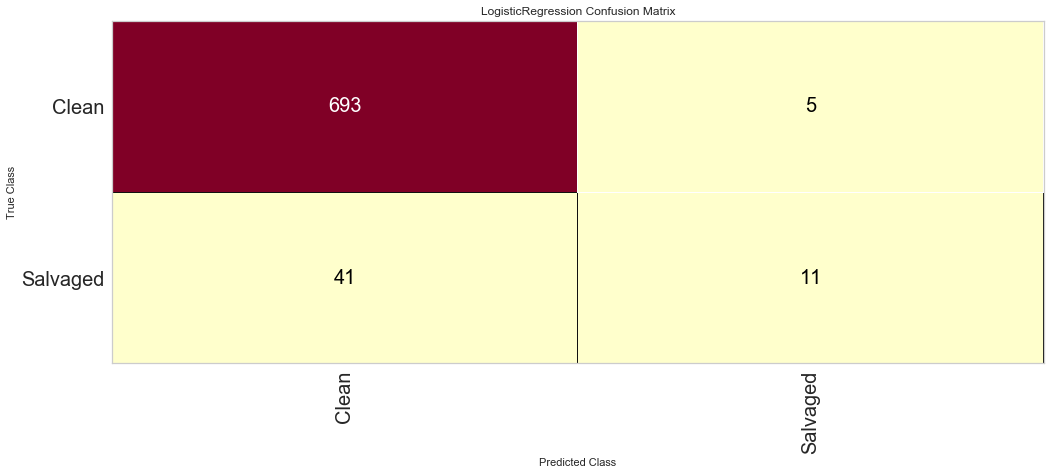

In [295]:
############################################################################
# Logistic Regression 
############################################################################

##displaying in Confusion Matrix:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
import warnings
warnings.filterwarnings("ignore")

# Instantiate the classification model 
model_l = LogisticRegression()
model_l= model_l.fit(X_train, y_train)

#The ConfusionMatrix visualizer taxes a model
#classes = ['Not_survived','Survived']

classes = ['Clean','Salvaged']

#models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')


########################################################
       
cm = ConfusionMatrix(model_l, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

pred_l = model_l.predict(X_val)


print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model_l.score(X_val, y_val)))

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()


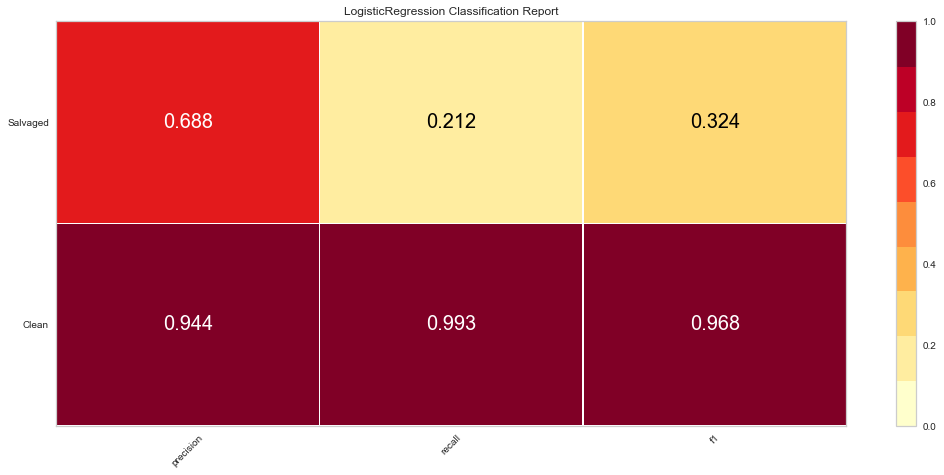

In [272]:
# Logistic Regression: Precision, Recall, and F1 Score - 


# set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model_l, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()


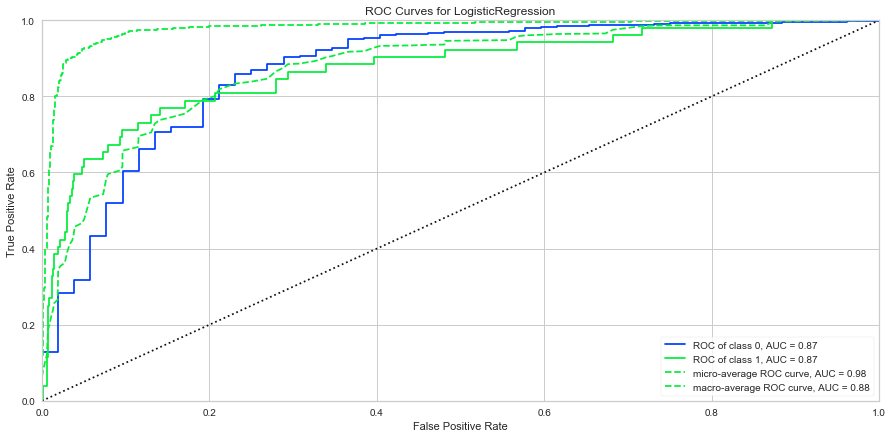

In [273]:
# logistic Regression: ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model_l)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

In [274]:
# LOGISTIC REGRESSION: Cross-validate model using accuracy

from sklearn.model_selection import KFold, cross_val_score

print('LOGISTIC REGRESSION: Cross-validation model:\n ')

print('\nAccuracy:\n',cross_val_score(model_l, X_train, y_train, scoring="accuracy"))

print('\nPrecision:\n',cross_val_score(model_l, X_train, y_train, scoring="precision"))

print('\nRecall:\n',cross_val_score(model_l, X_train, y_train, scoring="recall"))

print('\nF1 score:\n',cross_val_score(model_l, X_train, y_train, scoring="f1"))



LOGISTIC REGRESSION: Cross-validation model:
 

Accuracy:
 [0.95428571 0.94285714 0.94571429 0.94857143 0.95988539]

Precision:
 [1.         0.66666667 0.63636364 1.         0.9       ]

Recall:
 [0.27272727 0.18181818 0.31818182 0.2173913  0.40909091]

F1 score:
 [0.42857143 0.28571429 0.42424242 0.35714286 0.5625    ]


In [277]:
score = model_l.score(X_train, y_train)
print("Training score: ", score)

Training score:  0.9639794168096055


In [278]:
from sklearn.metrics import classification_report
print('CLASSIFICATION REPORT: Logistic Regression\n\n:',classification_report(y_val, pred_l))

CLASSIFICATION REPORT: Logistic Regression

:               precision    recall  f1-score   support

           0       0.94      0.99      0.97       698
           1       0.69      0.21      0.32        52

    accuracy                           0.94       750
   macro avg       0.82      0.60      0.65       750
weighted avg       0.93      0.94      0.92       750



In [279]:
# Logistic Regression: optimal threshold area under ROC:

# roc curve for logistic regression model with optimal threshold
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import sklearn.linear_model as lm



# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# predict probabilities
yhat = model.predict_proba(X_val)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_val, yhat)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))


Best Threshold=0.067485


In [280]:
############################################################################
# FOREST MODEL 
############################################################################

Accuracy of Random forest classifier on test set: 0.94


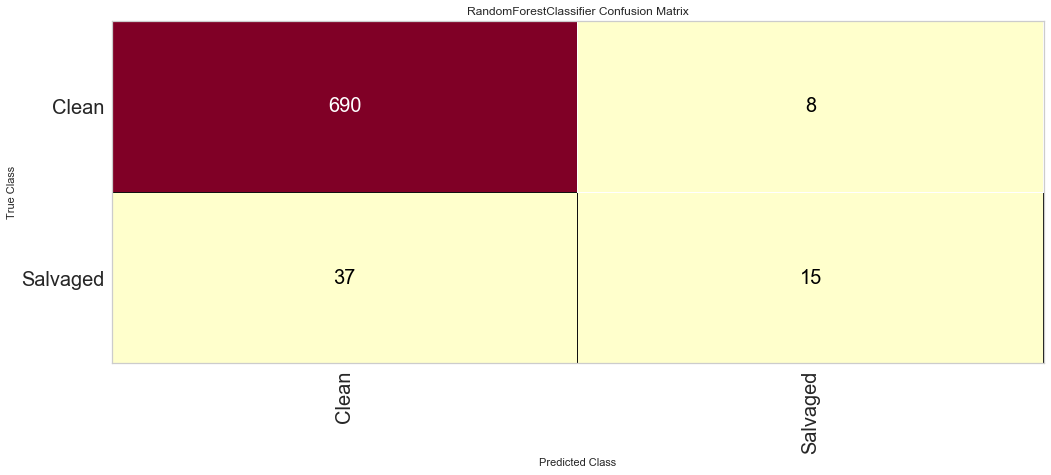

In [281]:
## Forest Model : Confusion Matrix : 

# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# Load data
features = X_train
target =  y_train

# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model_r = randomforest.fit(features, target)

classes = ['Clean','Salvaged']

     
cm = ConfusionMatrix(randomforest, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

pred_r = model_r.predict(X_val)
print('Accuracy of Random forest classifier on test set: {:.2f}'.format(model_r.score(X_val, y_val)))

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()


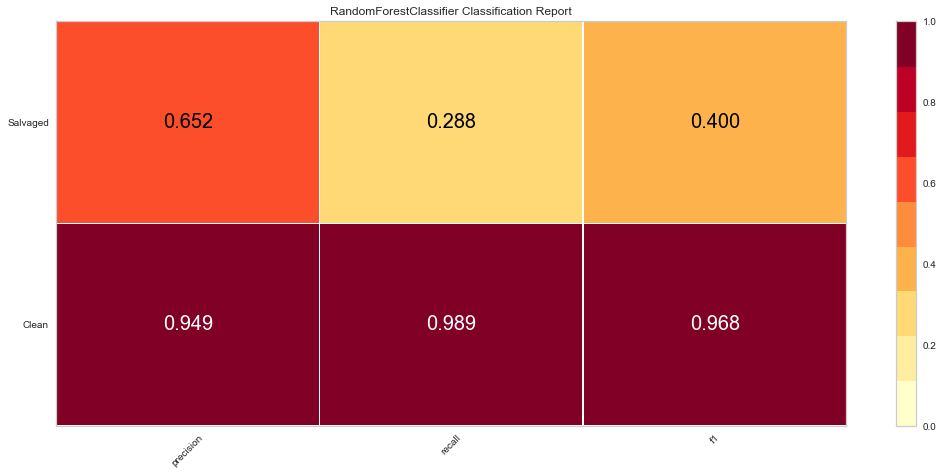

In [282]:
# Random Forest : Precision, Recall, and F1 Score - 


# set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model_r, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()


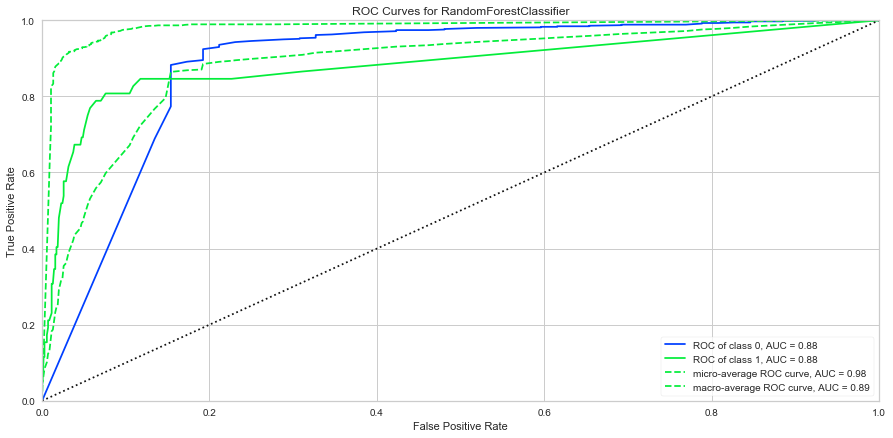

In [283]:
# Random Forest ROC Curves: 

randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model_r)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

In [284]:
from sklearn.metrics import classification_report
print('CLASSIFICATION REPORT: Random Forest\n\n:',classification_report(y_val, pred_r))



CLASSIFICATION REPORT: Random Forest

:               precision    recall  f1-score   support

           0       0.95      0.99      0.97       698
           1       0.65      0.29      0.40        52

    accuracy                           0.94       750
   macro avg       0.80      0.64      0.68       750
weighted avg       0.93      0.94      0.93       750



In [285]:
### RANDOM FOREST: Cross-validate model  ###########################

from sklearn.model_selection import KFold, cross_val_score

print('Random Forest Cross-validation model:\n ')
print('\nAccuracy:\n',cross_val_score(model_r, X_train, y_train, scoring="accuracy"))

print('\nPrecision:\n',cross_val_score(model_r, X_train, y_train, scoring="precision"))

print('\nRecall:\n',cross_val_score(model_r, X_train, y_train, scoring="recall"))

print('\nF1 score:\n',cross_val_score(model_r, X_train, y_train, scoring="f1"))

Random Forest Cross-validation model:
 

Accuracy:
 [0.95142857 0.94857143 0.95428571 0.96285714 0.95988539]

Precision:
 [0.72727273 0.75       0.75       1.         0.83333333]

Recall:
 [0.36363636 0.27272727 0.40909091 0.43478261 0.45454545]

F1 score:
 [0.48484848 0.4        0.52941176 0.60606061 0.58823529]


In [286]:
#### Random Forest: optimal threshold area under ROC:

# roc curve for RAndom Forest model with optimal threshold
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
# generate dataset
#X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
#n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# split into train/test sets

# fit a model
#model = LogisticRegression(solver='lbfgs')

randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
randomforest.fit(X_train, y_train)
# predict probabilities
yhat = randomforest.predict_proba(X_val)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_val, yhat)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.130000


In [287]:
###############################################################
### MULTIPLE MODEL CLASSIFIER FROM MULTIPLE LEARNING ALGORITHMS
####  From Chapter 12.3 book     #################################
####################################################################


# Load libraries
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Set random seed
np.random.seed(0)

# Load data

features = X_train
target =  y_train

# Create a pipeline
pipe = Pipeline([("classifier", RandomForestClassifier())])

# Create dictionary with candidate learning algorithms and their hyperparameters
search_space = [{"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l1', 'l2'],
                 "classifier__C": np.logspace(0, 4, 10)},
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_features": [1, 2, 3]}]

# Create grid search
gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=0)


# Fit grid search
best_model = gridsearch.fit(features, target)

best_model.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('classifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                       

In [288]:
print('best model \n:',best_model.best_estimator_.get_params()["classifier"])

print('best model predictive featuress \n:',best_model.predict(features))

best model 
: LogisticRegression(C=1291.5496650148827, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
best model predictive featuress 
: [0 0 0 ... 0 0 0]


In [300]:
print(best_model.predict(features))

[0 0 0 ... 0 0 0]


Accuracy of SGD classifier on test set: 0.94


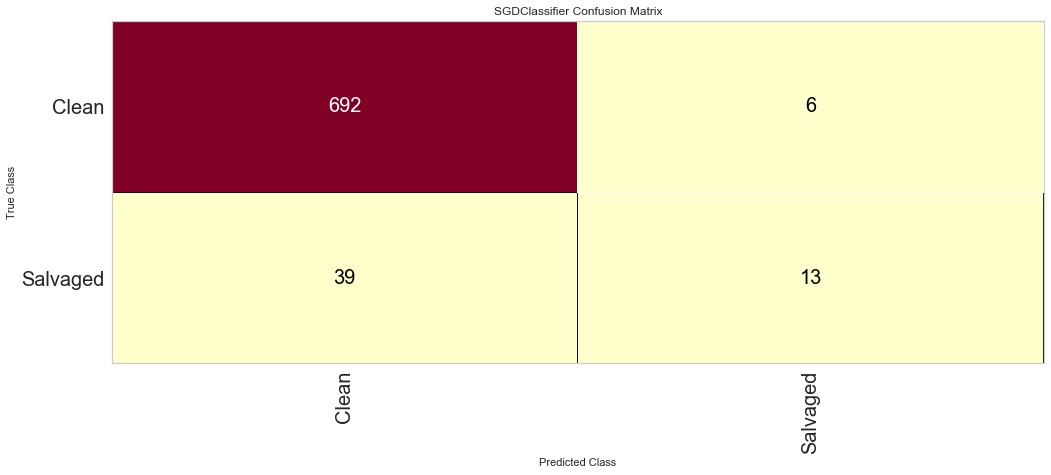

In [289]:
################################################################
###       SGD Model :      #####################################
################################################################

#  SGD Model : Confusion Matrix :

# Load libraries
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale

# Load data
features = X_train
target =  y_train

# Create SGD classifier object
sgdc = SGDClassifier(max_iter=1000, tol=0.01)

# Train model
model_s = sgdc.fit(features, target)

classes = ['Clean','Salvaged']


       
cm_s = ConfusionMatrix(sgdc, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm_s.fit(X_train, y_train)

pred_s = sgdc.predict(X_val)
print('Accuracy of SGD classifier on test set: {:.2f}'.format(model_s.score(X_val, y_val)))

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm_s.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm_s.ax.texts:
    label.set_size(20)

#How did we do?
cm_s.poof()


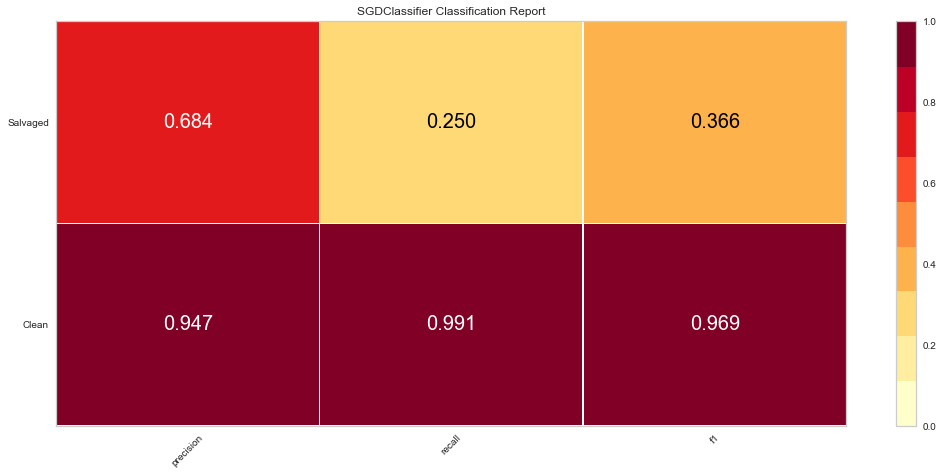

In [290]:
#### SGD : Precision, Recall, and F1 Score - 


# set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model_s, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

In [291]:
##  SGD Classifier  Score :

score = sgdc.score(X_train, y_train)
print("Training score: ", score)

from sklearn.metrics import classification_report
print('CLASSIFICATION REPORT: SGD \n\n:',classification_report(y_val, pred_s))

Training score:  0.964551172098342
CLASSIFICATION REPORT: SGD 

:               precision    recall  f1-score   support

           0       0.95      0.99      0.97       698
           1       0.68      0.25      0.37        52

    accuracy                           0.94       750
   macro avg       0.82      0.62      0.67       750
weighted avg       0.93      0.94      0.93       750



Accuracy of Decion Tree classifier on test set: 0.92


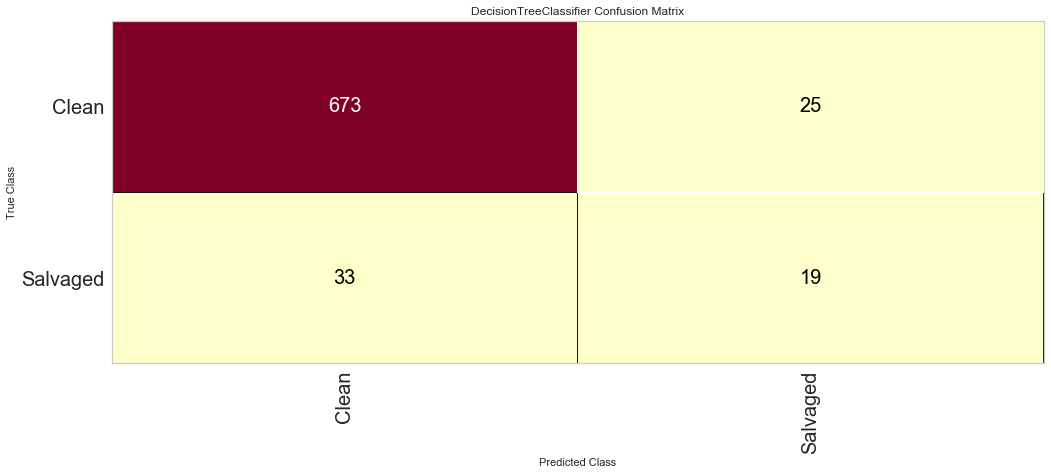

In [297]:
################################################################
###       Decision Tree Model :      ###########################
################################################################


from sklearn import tree


tree = tree.DecisionTreeClassifier()
model_t = tree.fit(X_train, y_train)

classes = ['Clean','Salvaged']


       
cm_t = ConfusionMatrix(tree, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm_t.fit(X_train, y_train)

pred_t = model_t.predict(X_val)
print('Accuracy of Decion Tree classifier on test set: {:.2f}'.format(model_t.score(X_val, y_val)))

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm_t.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm_t.ax.texts:
    label.set_size(20)

#How did we do?
cm_t.poof()


#tree.plot_tree(cm_t) 


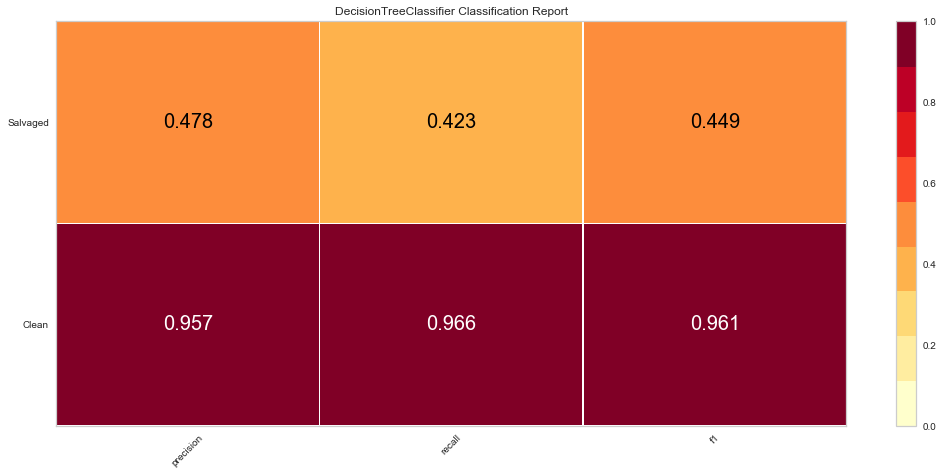

In [293]:
#### Decision Tree : Precision, Recall, and F1 Score - 


# set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model_t, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

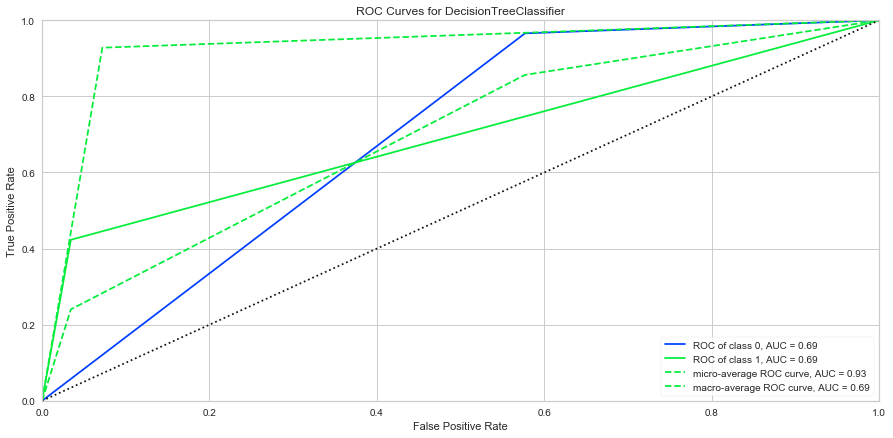

In [296]:
# Decision Tree: ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model_t)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

In [294]:
#### Decision Tree : CLASSIFICATION REPORT 


from sklearn.metrics import classification_report
print('CLASSIFICATION REPORT: Decision Tree \n\n:',classification_report(y_val, pred_t))

CLASSIFICATION REPORT: Decision Tree 

:               precision    recall  f1-score   support

           0       0.96      0.97      0.96       698
           1       0.48      0.42      0.45        52

    accuracy                           0.93       750
   macro avg       0.72      0.69      0.71       750
weighted avg       0.92      0.93      0.93       750

